# The Rio 2016 Olympics

The data source is Kaggle: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

## [ ] Load the data

In [1]:
import pandas as pd

df_olympics = pd.read_csv('athlete_events.csv', index_col=0)
df_olympics

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


## Select the data from Rio 2016

### Filter the rows

In [5]:
mask = df_olympics.Year == 2016

In [8]:
mask.value_counts()

False    257428
True      13688
Name: Year, dtype: int64

In [10]:
df_rio = df_olympics[mask].copy()

In [11]:
df_rio

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


### Drop the columns with the same value, such as `Year`

In [18]:
df_rio = df_rio.drop(columns=['Games', 'Year', 'Season', 'City'])

## In total, how many athletes participated in Rio 2016?

- Every row represents one athlete, if you count how many rows in the `DataFrame` we have, you'll have the number of athletes

In [21]:
df_rio.shape

(13688, 10)

In [22]:
df_rio.shape[0]

13688

## How many unique countries participanted in Rio 2016?

- Use the column `NOC`

In [25]:
len(df_rio.NOC.unique())

207

In [26]:
df_rio.NOC.nunique()

207

In [31]:
df_rio.Team.value_counts().tail(10)

Italy-2              2
Switzerland-1        2
Nauru                2
Czech Republic-2     2
Austria-1            2
Romania-1            2
Indonesia-2          2
Poland-2             2
Equatorial Guinea    1
Tuvalu               1
Name: Team, dtype: int64

## [ ] Which country brought more athletes?

### Count how many athletes each country brought

- Every row represents one athlete. So, you could count how many times each `NOC` is repeated.

In [34]:
res = df_rio.NOC.value_counts()

### Select the top 10 countries

In [37]:
res = res.head(10)

### Visualize the data with a bar plot

- Interconnection of pandas with matplotlib; instance and function

In [43]:
res = res.sort_values()

<AxesSubplot: >

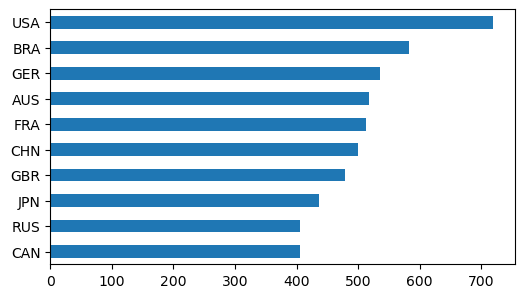

In [44]:
res.plot.barh()

## Which country brought the youngest athletes?

### Calculate the average age by country

- How to thinkg about these types of problems
    1. Identify the important columns
    2. Groupby the categorical column
    3. Select the numerical column
    4. Apply the mathematical operation

In [49]:
dfres = df_rio[['Age', 'NOC']]

In [52]:
res = dfres.groupby('NOC').Age.mean()

### Sort the rows by the average age and get the 10 youngest countries

In [56]:
res = res.sort_values().head(10)

### Reset the index to have a DataFrame

In [59]:
dfres = res.reset_index()

### Visualize the data in a barplot

In [61]:
import plotly.express as px

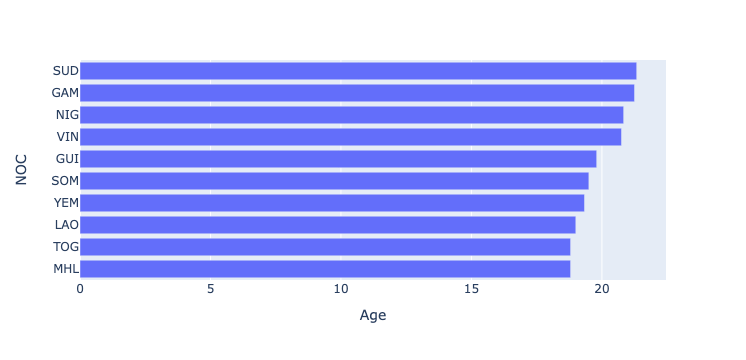

In [63]:
px.bar(data_frame=dfres, y='NOC', x='Age')

In [60]:
dfres

,NOC,Age
0,MHL,18.800000
1,TOG,18.800000
2,LAO,19.000000
3,YEM,19.333333
4,SOM,19.500000
5,GUI,19.800000
6,VIN,20.750000
7,NIG,20.833333
8,GAM,21.250000
9,SUD,21.333333


## [ ] How many medals of each type were given?

In [69]:
res = df_rio.Medal.value_counts()

<AxesSubplot: >

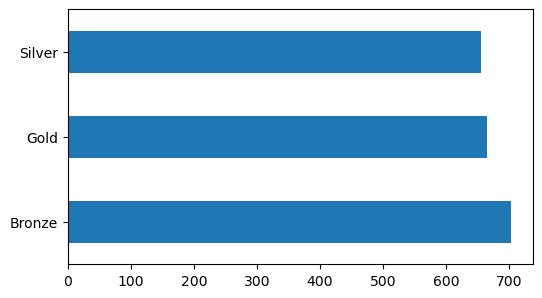

In [72]:
res.plot.barh()

## Which countries won more medals?

### Filter the athletes that won medals

In [77]:
mask = df_rio.Medal.isna()

In [81]:
df_medals = df_rio[~mask]

### Count the number of medals by country

In [88]:
res = df_medals.NOC.value_counts()

### Select the top 10

In [95]:
res = res.iloc[:10]

### Reset the index to get a DataFrame

In [98]:
dfres = res.reset_index()

### Change the names of the columns

In [102]:
dfres.columns = ['Country', 'Medals']

### Visualize the Data

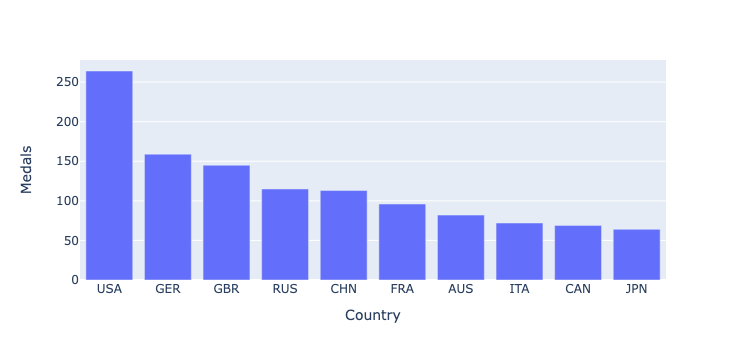

In [107]:
px.bar(data_frame=dfres, x='Country', y='Medals')

In [111]:
dfres = dfres.sort_values('Medals')

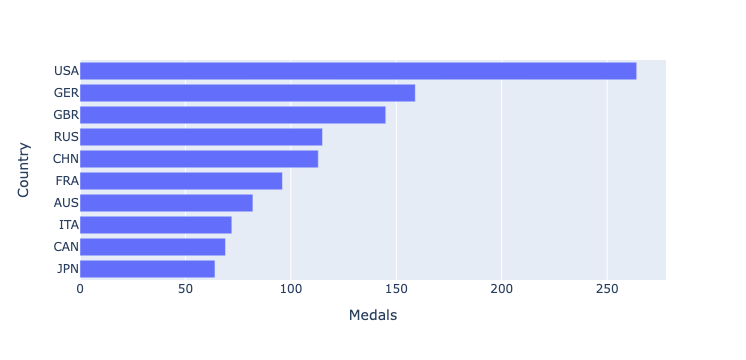

In [112]:
px.bar(data_frame=dfres, y='Country', x='Medals')

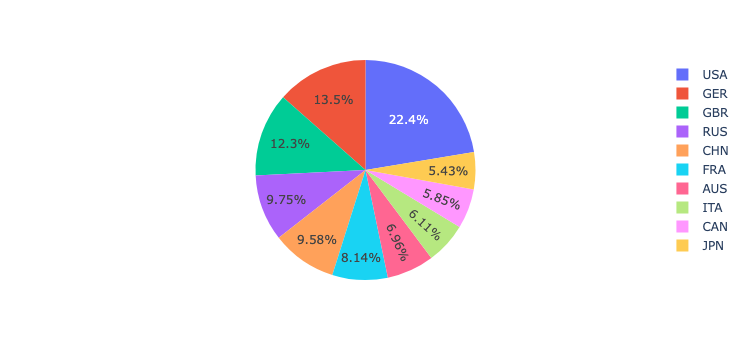

In [113]:
px.pie(data_frame=dfres, names='Country', values='Medals')

In [104]:
dfres

,Country,Medals
0,USA,264
1,GER,159
2,GBR,145
3,RUS,115
4,CHN,113
5,FRA,96
6,AUS,82
7,ITA,72
8,CAN,69
9,JPN,64


## [ ] Which countries won more gold medals?

- Grouping by multiple columns and calculating the number of elements; different than math operations.

### Count how many medals by type each country won

In [116]:
res = df_medals.groupby(by=['NOC', 'Medal']).size()

In [120]:
dfres = res.reset_index(name='Freq')

### Select the top 10 countries who won gold medals

#### Filter the rows by gold medals

In [124]:
mask = dfres.Medal == 'Gold'

In [127]:
df_golds = dfres[mask]

#### Filter the top 10 countries

In [134]:
dfres = df_golds.sort_values('Freq').tail(10)

### Visualize the data

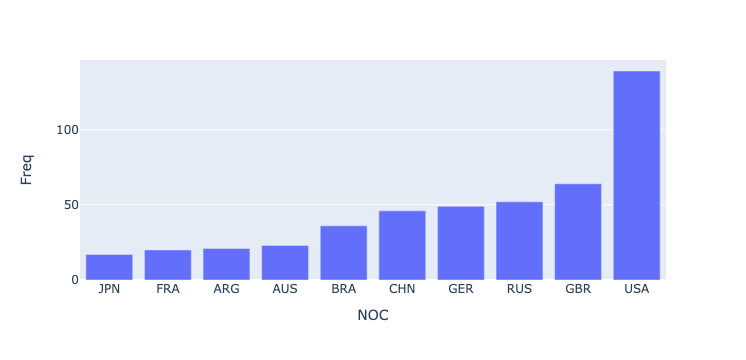

In [136]:
px.bar(data_frame=dfres, x='NOC', y='Freq')

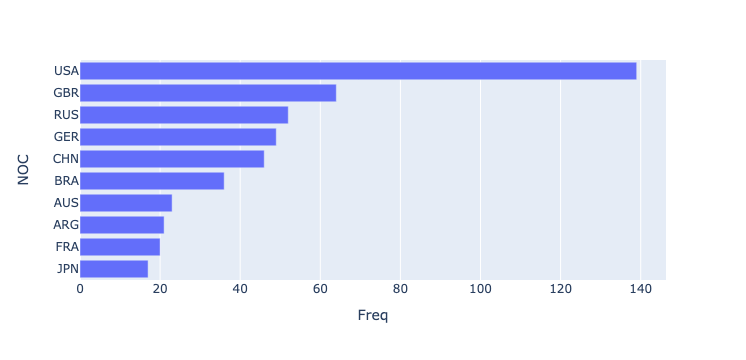

In [137]:
px.bar(data_frame=dfres, y='NOC', x='Freq')

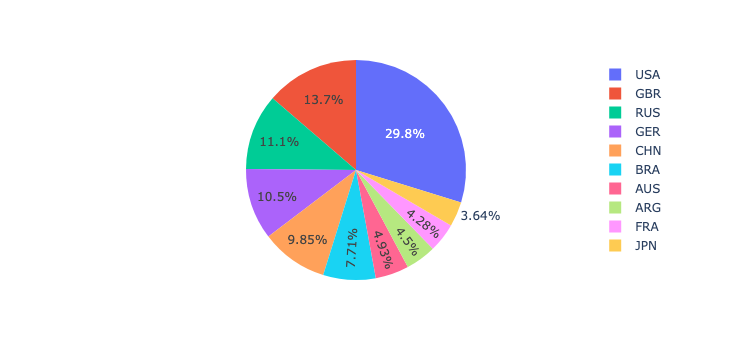

In [138]:
px.pie(data_frame=dfres, names='NOC', values='Freq')

## BONUS: Represent the top 10 gold medal countries

### Save the top 10 gold medal countries in a new variable

In [141]:
top_gold_10 = dfres.NOC

In [143]:
top_gold_10

100    JPN
63     FRA
1      ARG
6      AUS
22     BRA
32     CHN
72     GER
147    RUS
66     GBR
180    USA
Name: NOC, dtype: object

### Filter the rows of the top 10 gold medal countries

In [147]:
mask = df_medals.NOC.isin(top_gold_10)

In [149]:
dfres = df_medals[mask]

### Calculate how many medals won each of the top 10 gold medal countires

In [155]:
dfres = dfres.groupby(by=['NOC', 'Medal']).size().reset_index(name='Freq')

### Visualize the data

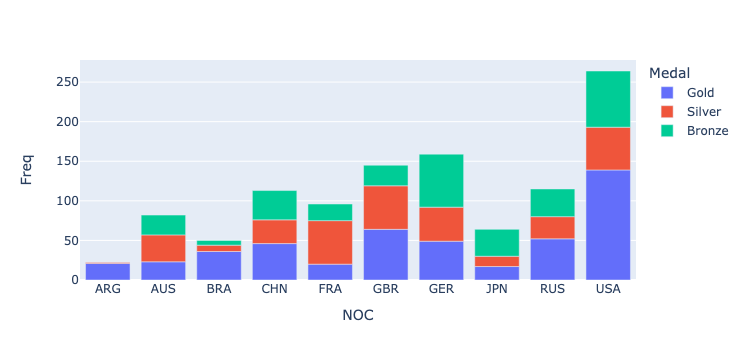

In [159]:
px.bar(data_frame=dfres, x='NOC', y='Freq', color='Medal')

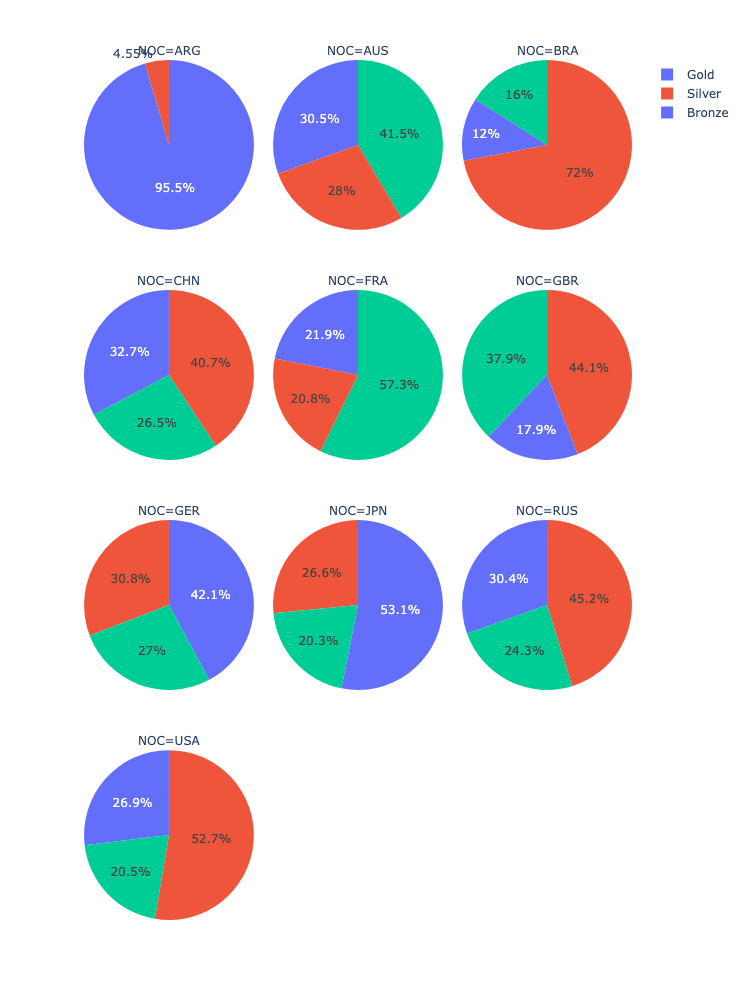

In [168]:
px.pie(data_frame=dfres, names='Medal', values='Freq',
       facet_col='NOC', color='Medal', facet_col_wrap=3, height=1000)

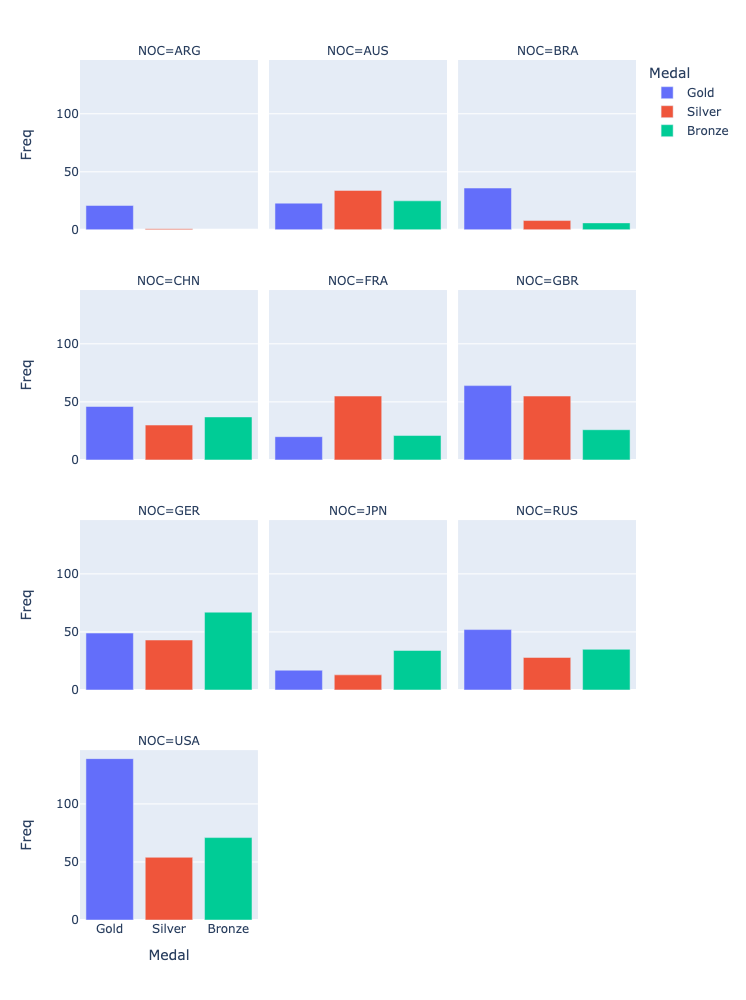

In [167]:
px.bar(data_frame=dfres, x='Medal', y='Freq',
       facet_col='NOC', color='Medal', facet_col_wrap=3, height=1000)

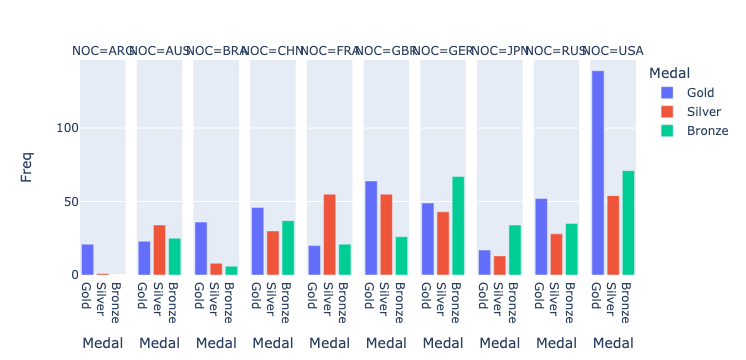

In [ ]:
px.bar(data_frame=dfres, x='Medal', y='Freq', facet_col='NOC', color='Medal')

## Which athlete won more medals?

In [188]:
df_medals.Name.value_counts()

Michael Fred Phelps, II               6
Kathleen Genevieve "Katie" Ledecky    5
                                     ..
Timm Herzbruch                        1
Martin Zwicker                        1
Name: Name, Length: 1855, dtype: int64

In [192]:
dfres = df_medals.groupby(by=['NOC', 'Name']).size().reset_index(name='Freq')

In [196]:
dfres = dfres.sort_values('Freq').tail(10)

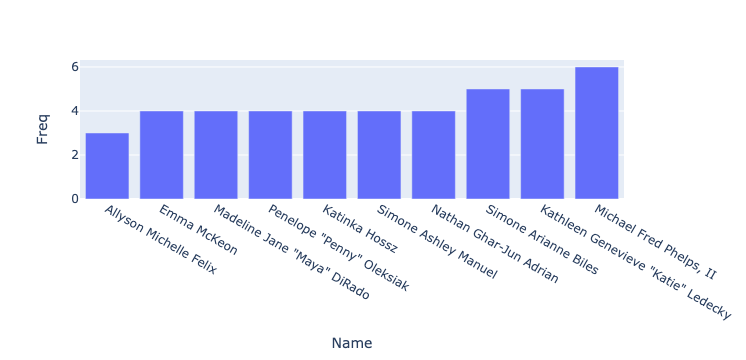

In [198]:
px.bar(data_frame=dfres, x='Name', y='Freq')

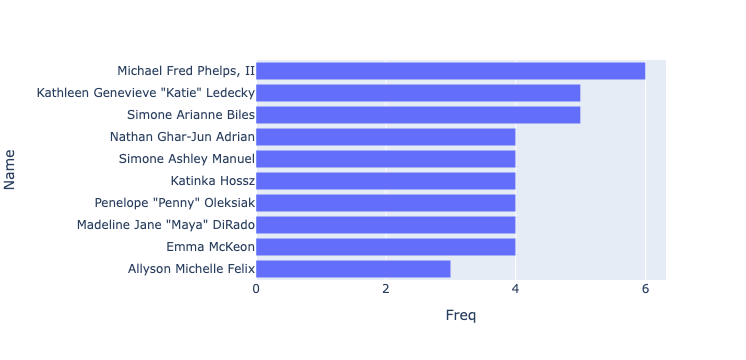

In [199]:
px.bar(data_frame=dfres, y='Name', x='Freq')

In [197]:
dfres

,NOC,Name,Freq
1636,USA,Allyson Michelle Felix,3
53,AUS,Emma McKeon,4
1768,USA,"Madeline Jane ""Maya"" DiRado",4
266,CAN,"Penelope ""Penny"" Oleksiak",4
942,HUN,Katinka Hossz,4
1817,USA,Simone Ashley Manuel,4
1792,USA,Nathan Ghar-Jun Adrian,4
1816,USA,Simone Arianne Biles,5
1734,USA,"Kathleen Genevieve ""Katie"" Ledecky",5
1785,USA,"Michael Fred Phelps, II",6
